In [328]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

# Read employees dataset
df_employee_raw = pd.read_csv('data/employees4.csv', na_values=['\\N'], on_bad_lines='skip', infer_datetime_format=True, parse_dates=['Date_Joined', 'Date_Resigned', 'Inactive_Date'])
df_employee_raw.info()
print(f'Total employees {str(df_employee_raw["Employee_Code"].nunique())}')
print(f'Earliest join date {str(df_employee_raw["Date_Joined"].min())}')
print(f'Latest join date {str(df_employee_raw["Date_Joined"].max())}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Employee_No          1261 non-null   int64         
 1   Employee_Code        1261 non-null   int64         
 2   Name                 1261 non-null   object        
 3   Title                1261 non-null   object        
 4   Address_Line_1       1261 non-null   object        
 5   Address_Line_2       1181 non-null   object        
 6   Address_Line_3       952 non-null    object        
 7   Date_of_Birth        1261 non-null   object        
 8   Gender               1261 non-null   object        
 9   Religion_ID          1261 non-null   int64         
 10  Marital_Status       1170 non-null   object        
 11  Designation_ID       1261 non-null   int64         
 12  Date_Joined          1261 non-null   datetime64[ns]
 13  Date_Resigned        955 non-null

In [329]:
# Read leaves dataset, filter out special leave categories.
df_leaves = pd.read_csv('data/leaves_clean.csv')
df_leaves = df_leaves.rename(columns={'Employee_No': 'Employee_Code',
                                      'leave_date': 'Leave_Date',
                                      'Type': 'Leave_Factor',
                                      'Applied Date': 'Applied_Date',
                                      'leave_leave_date': 'Lieu_Leave_Date',
                                      'Remarks': 'Remarks',
                                      'apply_type': 'Leave_Category'})
df_leaves_type_map = {'Half Day': 0.5, 'Full Day': 1}
df_leaves['Leave_Factor'] = df_leaves['Leave_Factor'].map(df_leaves_type_map)
df_leaves_legit = pd.DataFrame(df_leaves.loc[(df_leaves['Leave_Category'] != 'Liue Leave') & (df_leaves['Leave_Category'] != 'Curfew') & (df_leaves['Leave_Category'] != 'Sat Holiday')])
df_leaves_summary_temp = df_leaves.groupby('Employee_Code')['Leave_Factor'].sum()
df_leaves_summary = pd.DataFrame({'Employee_Code': df_leaves_summary_temp.index, 'Leave_Count':  df_leaves_summary_temp.values})
df_leaves_summary.head()
#df_leaves_summary

,Employee_Code,Leave_Count
0,347,52.5
1,348,21.5
2,351,57.0
3,352,105.5
4,354,79.5


In [330]:
# Group two datasets

df_employee = pd.merge(df_employee_raw, df_leaves_summary, on='Employee_Code', how='left')
df_employee['Leave_Count'].fillna(0, inplace=True)
df_employee

,Employee_No,Employee_Code,Name,Title,Address_Line_1,Address_Line_2,Address_Line_3,Date_of_Birth,Gender,Religion_ID,...,Status,Status_Reason,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Leave_Count
0,347,6,Myrl Bechtelar MD,Mr,"No 40/B,","Nagahamula Road,",Kolonnawa.,1965-03-05,Male,1,...,Active,NaN,NaN,NaN,NaN,Staff,Permanant,Buddhist,Driver,0.0
1,348,33,Francis Mraz,Mr,"No 38/16/B,","Paanaluva,Vataraka,",Padukka.,1973-05-15,Male,1,...,Active,NaN,NaN,NaN,NaN,Staff,Permanant,Buddhist,Driver,0.0
2,349,53,Mr. Emmet Blick Jr.,Mr,"No 859/3,Rukmale Road,","Kottawa South,",Pannipitiya.,1974-12-06,Male,1,...,Inactive,RESIGN,2021-06-28,NaN,NaN,Staff,Permanant,Buddhist,Account Clerk,0.0
3,351,77,Mr. Nelson Braun PhD,Ms,"St Marys avenue,","Niripola,",Hanwella.,1974-04-30,Female,4,...,Inactive,Resign,2022-01-31,NaN,NaN,Staff,Permanant,Catholic,Purchasing Officer,0.0
4,352,88,Maximillian Hand,Mr,"No17/35,","Kridangana Mawatha,",Polgahawela.,1980-07-22,Male,1,...,Active,NaN,NaN,NaN,NaN,Staff,Permanant,Buddhist,Store Keeper,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2836,5434,Janis Borer Jr.,Ms,"No 339,","Kotte Road,",Nugegoda.,1993-03-23,Female,1,...,Inactive,Resign,2022-12-22,NaN,NaN,Staff,Contarct Basis,Buddhist,Account Executive,0.0
1257,2890,5479,Delphia Haley,Mr,"No 267/3,Dhammananda Mawatha,Pahala Beligala,B...",NaN,NaN,1994-10-06,Male,1,...,Active,NaN,0000-00-00,NaN,NaN,Staff,Contarct Basis,Buddhist,Quantity Surveyor,0.0
1258,2972,5480,Lance Stanton,Mr,"No 255/2,Jathika Niwasa,Arangala,Naula,matale.",NaN,NaN,1997-01-02,Male,1,...,Active,NaN,NaN,NaN,NaN,Staff,Contarct Basis,Buddhist,Software Developer,0.0
1259,2973,5481,Chauncey Reilly,Mr,"No 15/B,Badulla Road,Demodara",NaN,NaN,1990-08-16,Male,1,...,Active,NaN,0000-00-00,NaN,NaN,Staff,Contarct Basis,Buddhist,Quantity Surveyor,0.0


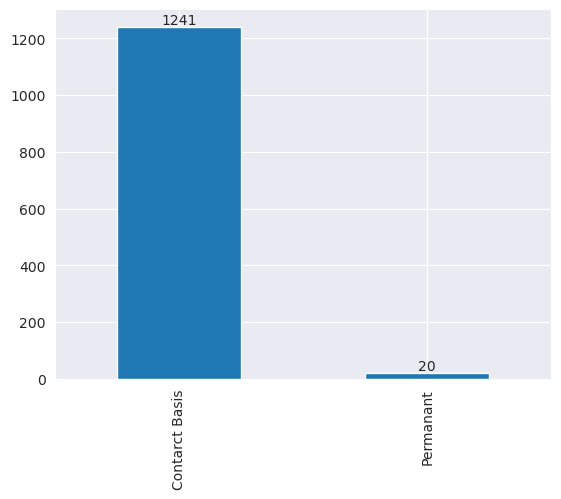

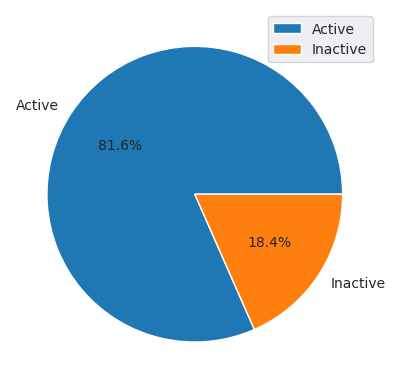

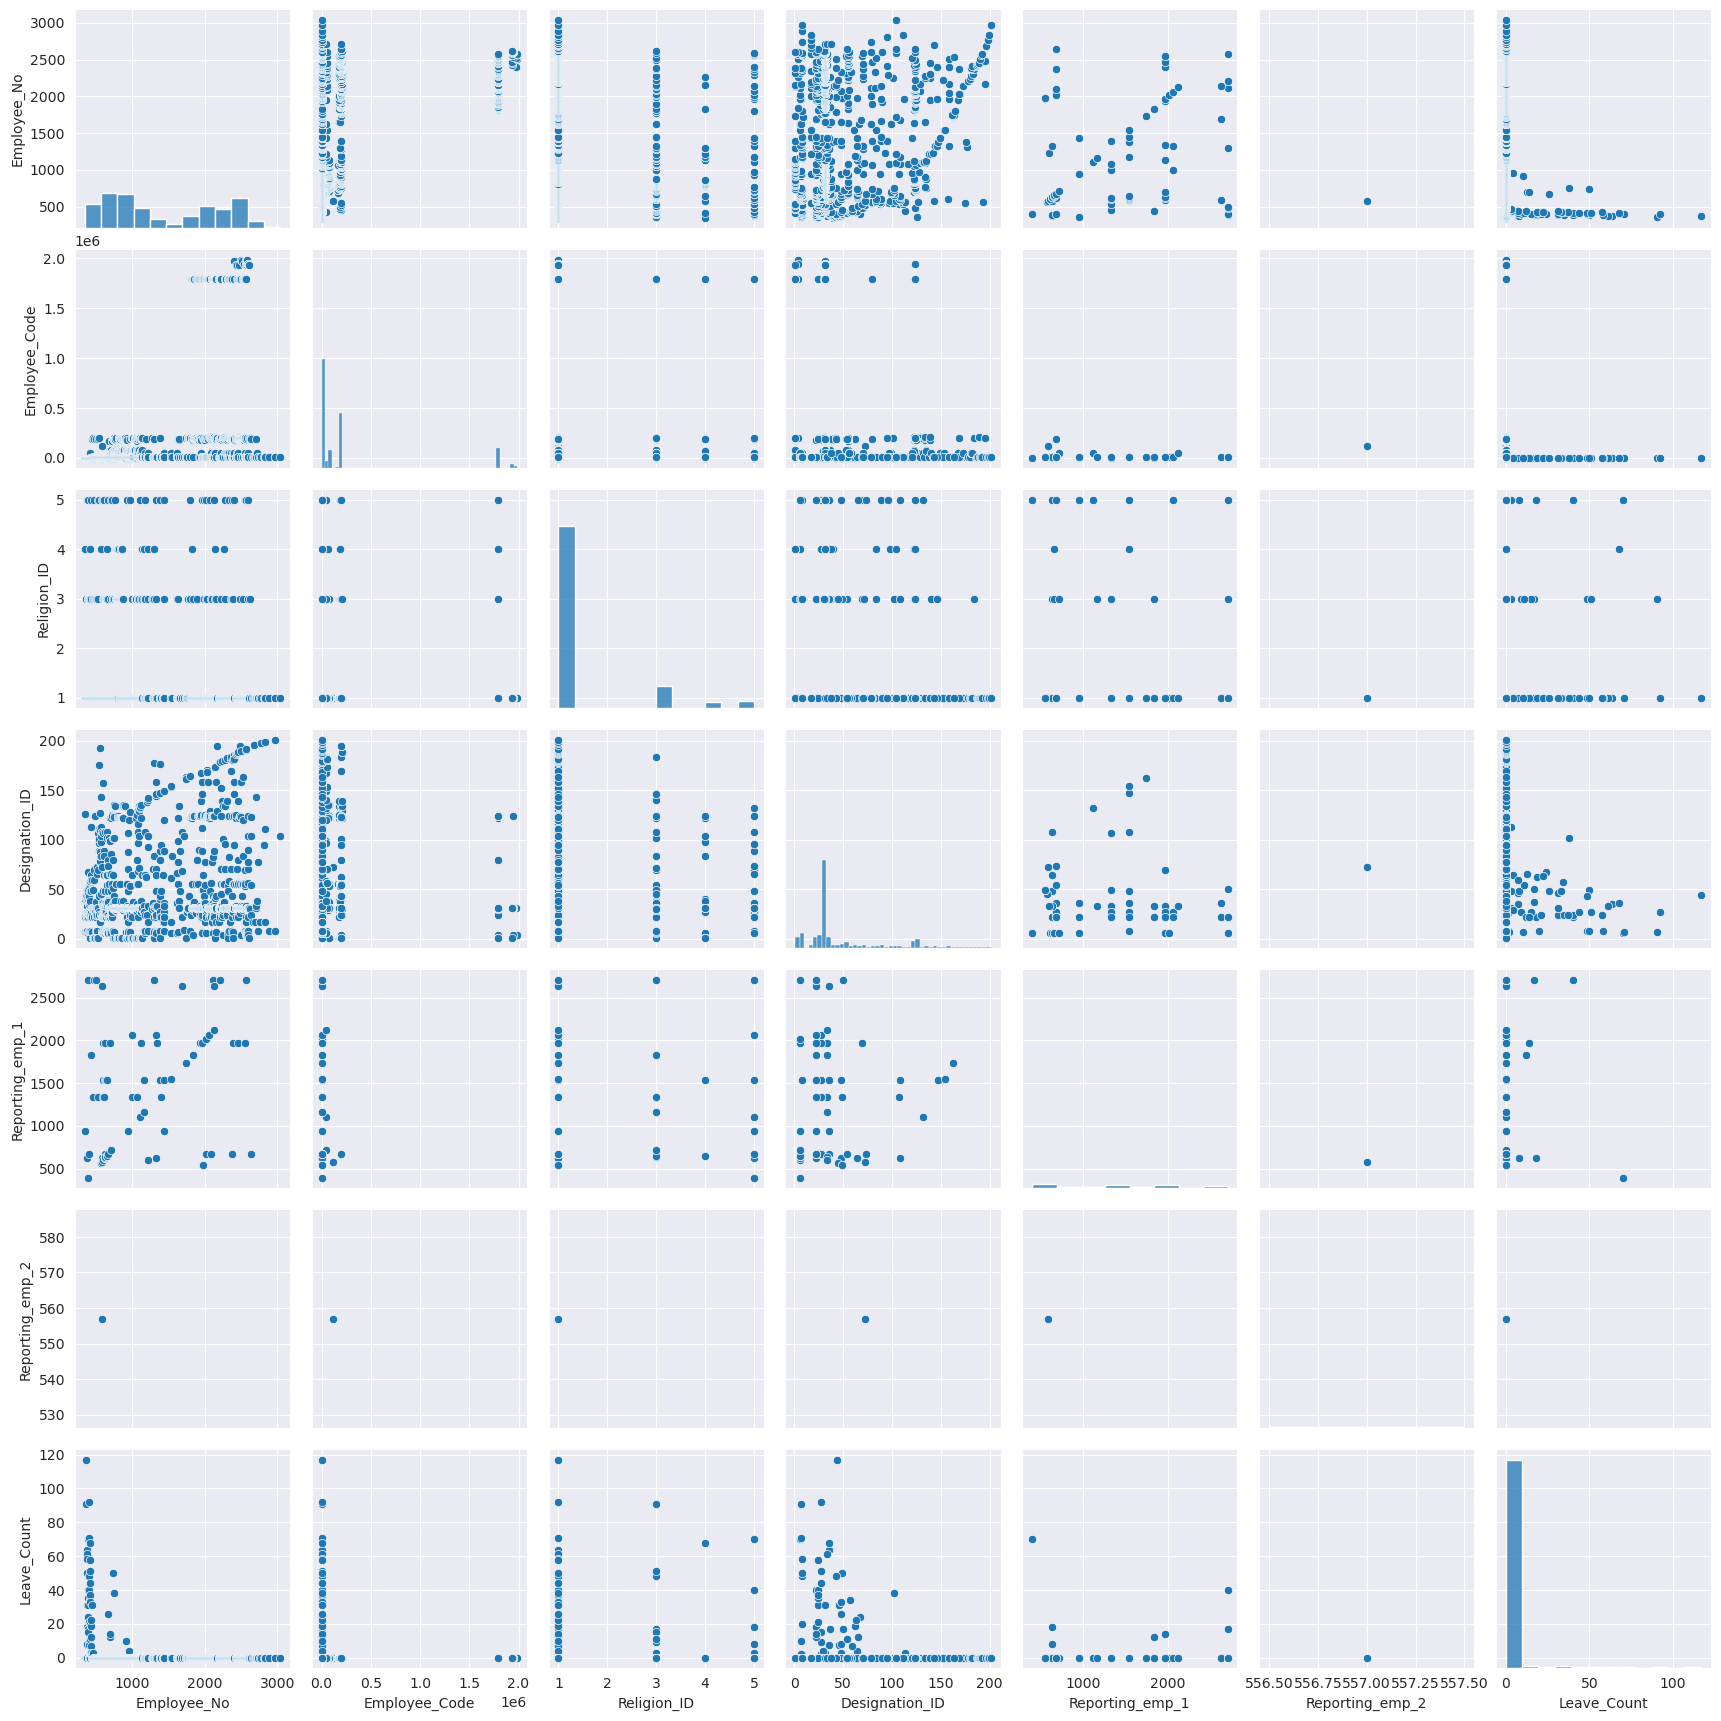

In [331]:
temp_plot = df_employee['Employment_Type'].value_counts().plot(kind='bar')
temp_plot.bar_label(temp_plot.containers[0], labels=df_employee['Employment_Type'].value_counts())
plt.show()

plt.pie(df_employee['Status'].value_counts(), labels=df_employee['Status'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

seaborn.pairplot(df_employee)
#temp_plot = df['Designation'].value_counts().plot(kind='pie')
#plt.legend()
#plt.show()

In [332]:
df_employee_inactive_contract_based = pd.DataFrame(df_employee.loc[(df_employee['Status'] == 'Inactive') & (df_employee['Employment_Type'] == 'Contarct Basis')])
df_employee_inactive_contract_based['Date_Joined'] = pd.to_datetime(df_employee_inactive_contract_based['Date_Joined'])
df_employee_inactive_contract_based['Date_Resigned'] = pd.to_datetime(df_employee_inactive_contract_based['Date_Resigned'], errors='coerce')
df_employee_inactive_contract_based['Employment_Duration'] = df_employee_inactive_contract_based['Date_Resigned'] - df_employee_inactive_contract_based['Date_Joined']
df_employee_inactive_contract_based['Employment_Duration'].describe()

count                            751
mean     408 days 12:14:22.849533956
std      468 days 17:30:17.438927584
min                  0 days 00:00:00
25%                108 days 12:00:00
50%                261 days 00:00:00
75%                556 days 00:00:00
max               3924 days 00:00:00
Name: Employment_Duration, dtype: object

In [333]:
df_employee_inactive_permanent =  pd.DataFrame(df_employee.loc[(df_employee['Status'] == 'Inactive') & (df_employee['Employment_Type'] == 'Permanant')])
df_employee_inactive_permanent['Date_Joined'] = pd.to_datetime(df_employee_inactive_permanent['Date_Joined'])
df_employee_inactive_permanent['Date_Resigned'] = pd.to_datetime(df_employee_inactive_permanent['Date_Resigned'], errors='coerce')
df_employee_inactive_permanent['Employment_Duration'] = df_employee_inactive_permanent['Date_Resigned'] - df_employee_inactive_permanent['Date_Joined']
df_employee_inactive_permanent['Employment_Duration'].describe()

count                               7
mean     6432 days 20:34:17.142857152
std      3677 days 16:37:16.130469952
min                 257 days 00:00:00
25%                5237 days 12:00:00
50%                5693 days 00:00:00
75%                8199 days 12:00:00
max               12206 days 00:00:00
Name: Employment_Duration, dtype: object

In [334]:
df_employee_inactive = pd.DataFrame(df_employee.loc[(df_employee['Status'] == 'Inactive')])
df_employee_inactive['Date_Joined'] = pd.to_datetime(df_employee_inactive['Date_Joined'])
df_employee_inactive['Date_Resigned'] = pd.to_datetime(df_employee_inactive['Date_Resigned'], errors='coerce')
df_employee_inactive['Employment_Duration'] = df_employee_inactive['Date_Resigned'] - df_employee_inactive['Date_Joined']
df_employee_inactive['Employment_Duration'].describe()
df_employee_inactive['Leave_Count'].describe()

count    1029.000000
mean        0.897959
std         6.994285
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       117.000000
Name: Leave_Count, dtype: float64

In [335]:
# Active contract base employee analysis.
from datetime import datetime
df_employee_active_contract_based = pd.DataFrame(df_employee.loc[(df_employee['Status'] == 'Active') & (df_employee['Employment_Type'] == 'Contarct Basis')])
df_employee_active_contract_based['Date_Joined'] = pd.to_datetime(df_employee_active_contract_based['Date_Joined'])
today_timestamp = pd.Timestamp(datetime.today().date())
df_employee_active_contract_based['Employment_Duration'] = today_timestamp - df_employee_active_contract_based['Date_Joined']
df_employee_active_contract_based['Employment_Duration'].describe()

count                             222
mean     1055 days 01:04:51.891891888
std      1048 days 06:38:08.001853440
min                  68 days 00:00:00
25%                 397 days 06:00:00
50%                 573 days 00:00:00
75%                1274 days 00:00:00
max                6299 days 00:00:00
Name: Employment_Duration, dtype: object

In [336]:
df_employee_inactive_contract_based['Leave_Count'].describe()

count    1019.000000
mean        0.791953
std         6.011727
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        92.000000
Name: Leave_Count, dtype: float64

In [337]:
df_employee_active_contract_based['Leave_Count'].describe()

count    222.000000
mean       3.132883
std       11.557613
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       70.500000
Name: Leave_Count, dtype: float64